In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pyarrow.feather as feather

In [2]:
input_root_path = "P:\SALMALIS Lab\Work Zone Dataset"

In [3]:
df = feather.read_feather(os.path.join(input_root_path, 'TravelTime_Valid_Recom_Weather_Traffic.ftr'))
# df['AssetNumber'] = df['AssetNumber'].astype(float)
print(df.nunique())
# df.set_index('AssetNumber', inplace=True)

AssetNumber                   423
AssetIdentifier               256
CreatedDate                546359
UnderConstructionTime         608
BaselineTime                  289
DelayTime                     665
State                           2
SegmentLength                 183
TravelDirect                    2
Spread                          7
TrafficImpact                   3
RoadType                        3
TrafficControlSetup             3
CreatedDate:Date              194
CreatedDate:Weekday             7
CreatedDate:DayOfYear         123
CreatedDate:Year                2
CreatedDate:Month               5
CreatedDate:Day                31
CreatedDate:Hour               24
CreatedDate:MinuteInDay      1440
CreatedDate:Season              3
Weather:StationID              12
Weather:Long                   11
Weather:Lat                    12
Weather:Temp                  382
Weather:Precip                 46
Weather:WindSpd                39
Traffic:SiteNo                 17
Traffic:IsTemp

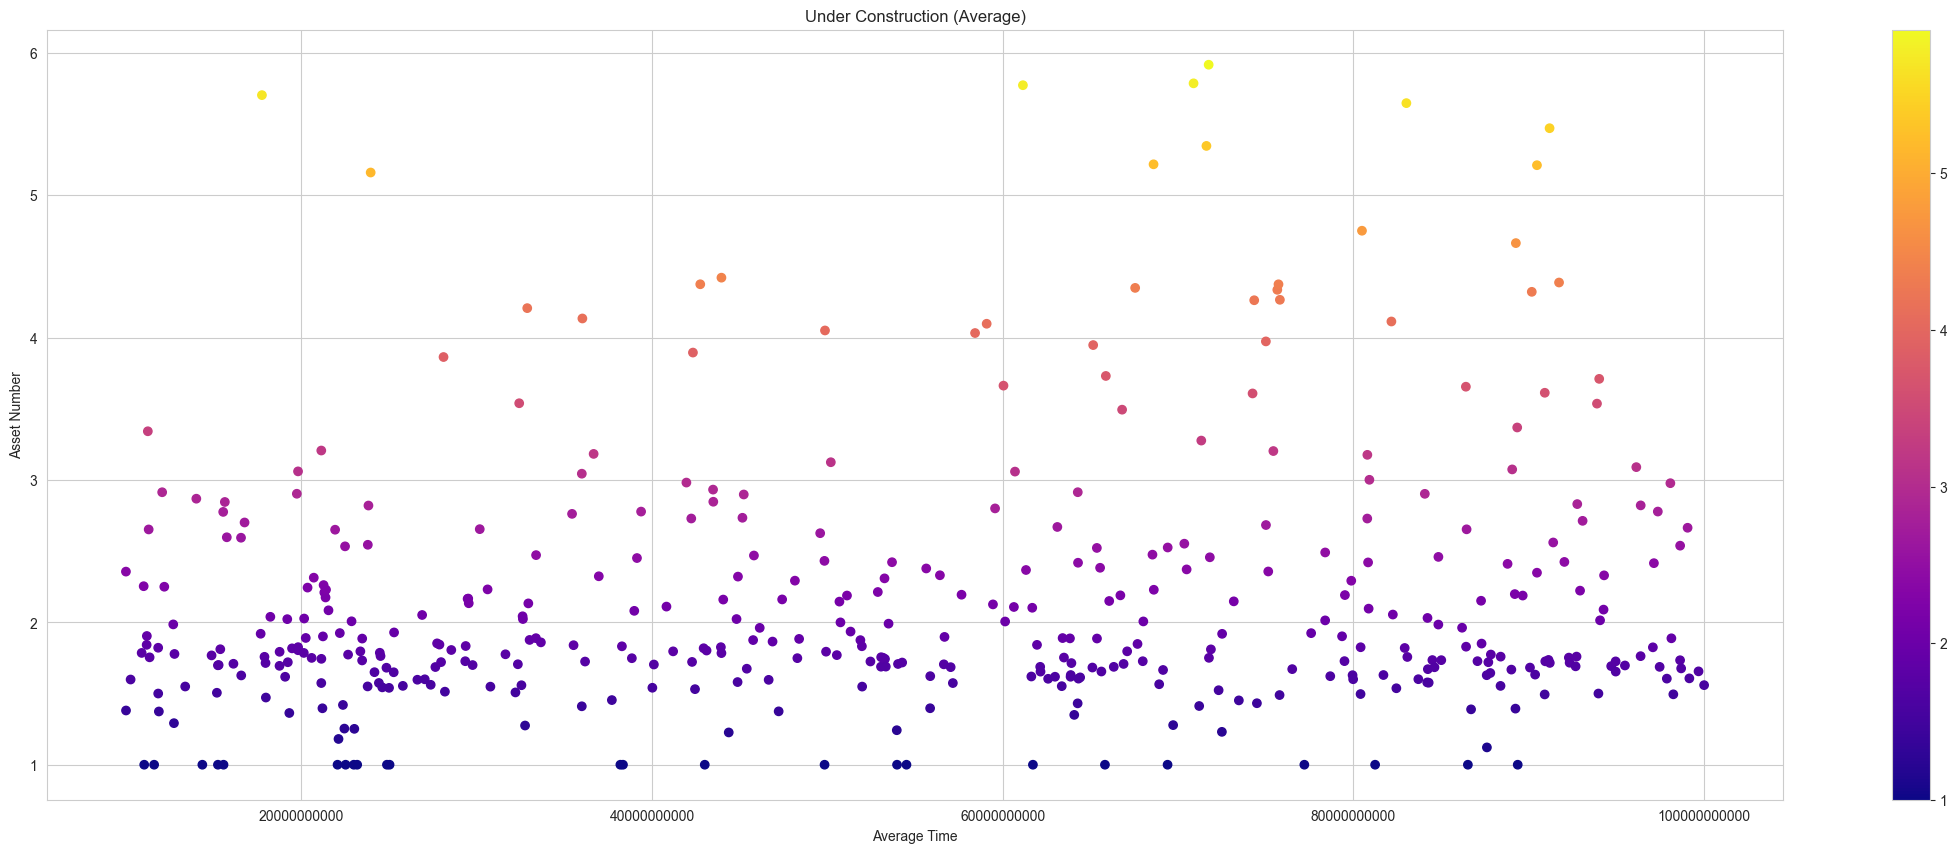

In [15]:
# plt.figure(figsize=(28,10))
temp = df.groupby('AssetNumber')['UnderConstructionTime'].mean().to_dict()
fig, ax = plt.subplots(figsize=(28,10))
ax.ticklabel_format(useOffset=False, style='plain')
plt.scatter(temp.keys(), temp.values(), c=list(temp.values()), cmap='plasma')
plt.title('Under Construction (Average)')
plt.xlabel('Average Time')
plt.ylabel('Asset Number')
plt.colorbar()

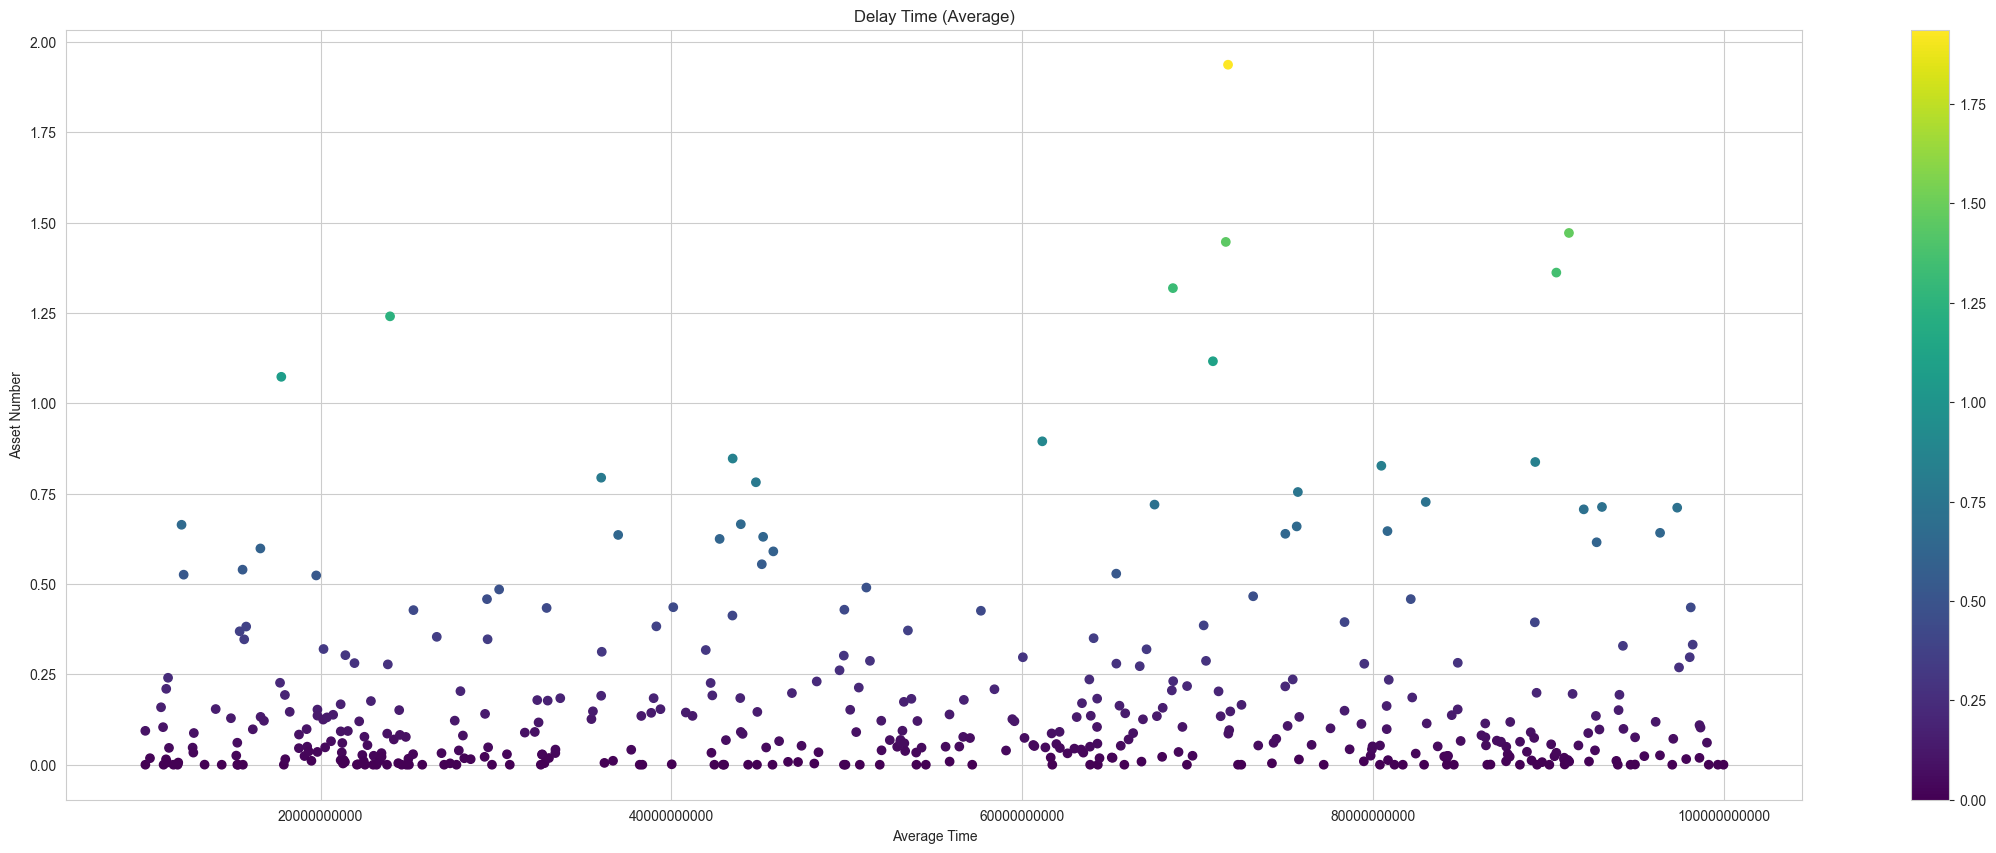

In [16]:
# plt.figure(figsize=(28,10))
temp = df.groupby('AssetNumber')['DelayTime'].mean().to_dict()
fig, ax = plt.subplots(figsize=(28,10))
ax.ticklabel_format(useOffset=False, style='plain')
plt.scatter(temp.keys(), temp.values(), c=list(temp.values()), cmap='viridis')
plt.title('Delay Time (Average)')
plt.xlabel('Average Time')
plt.ylabel('Asset Number')
plt.colorbar()

<AxesSubplot: title={'center': 'Under Construction Time (All Records)'}, xlabel='AssetNumber', ylabel='UnderConstructionTime'>

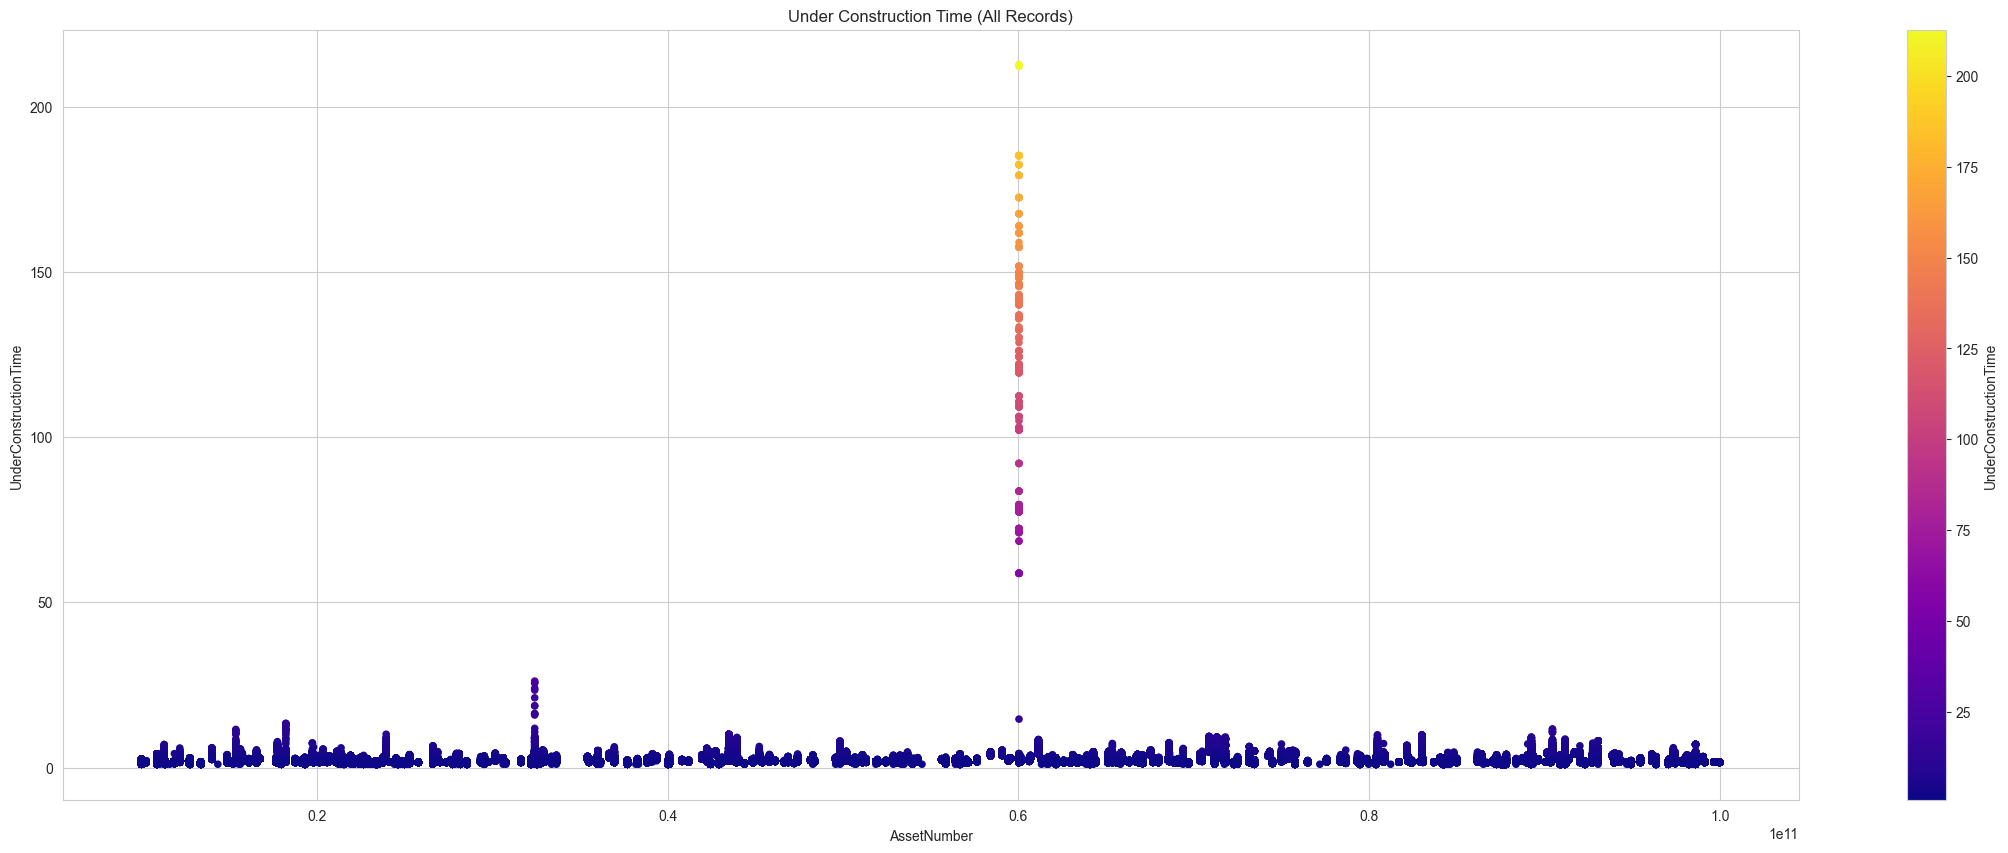

In [23]:
df.plot.scatter(x="AssetNumber", y="UnderConstructionTime", c="UnderConstructionTime", colormap='plasma', figsize = (28,10), title='Under Construction Time (All Records)')
# ax1 = plt.subplot()
# plt.xticks(df.index)
# plt.yticks(y)
# .groupby('AssetNumber')['UnderConstructionTime'].mean()

<AxesSubplot: title={'center': 'Delay Time (All Records)'}, xlabel='AssetNumber', ylabel='DelayTime'>

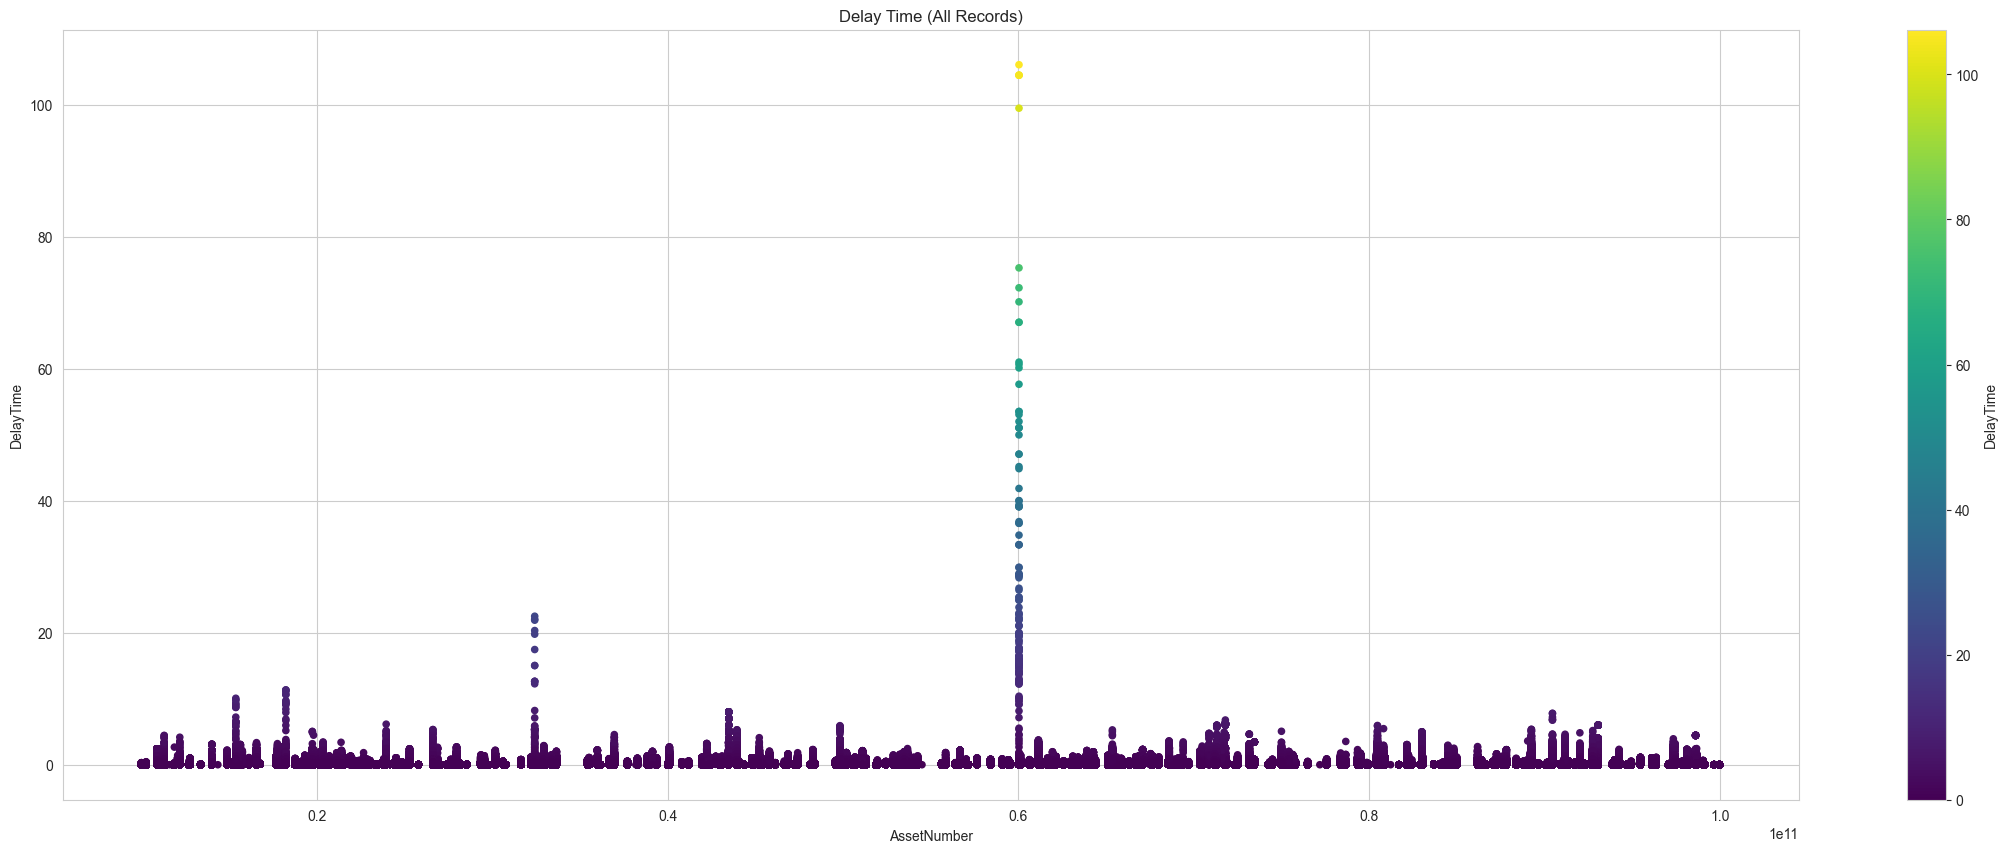

In [19]:
df.plot.scatter(x="AssetNumber", y="DelayTime", c="DelayTime", colormap='viridis', figsize = (28,10), title='Delay Time (All Records)')

In [12]:
# df.groupby('AssetNumber')['UnderConstructionTime'].plot.box()

<AxesSubplot: xlabel='AssetNumber'>

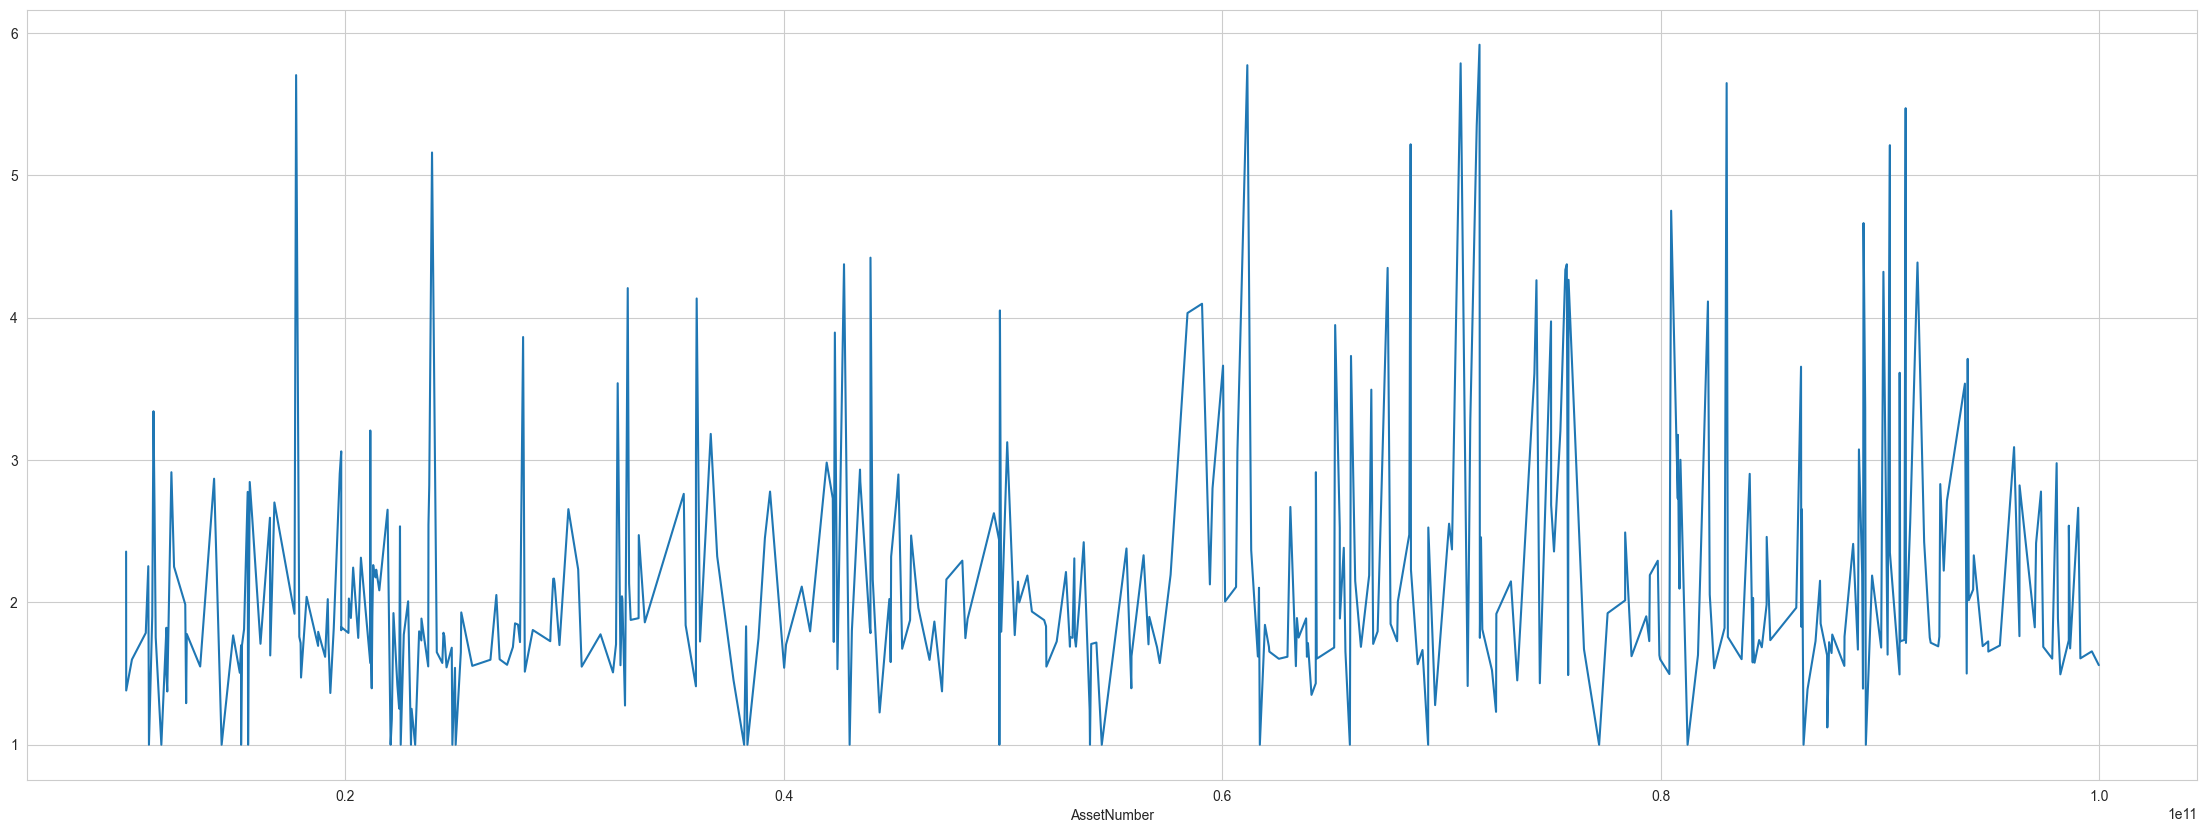

In [8]:
# fig, ax = plt.subplots(figsize=(28,8))
df.groupby('AssetNumber')['UnderConstructionTime'].mean().plot(figsize = (28,10))
# plt.xticks(df['AssetNumber'])
# ax.set_xticks(xticks, minor=True)
# plt.show()

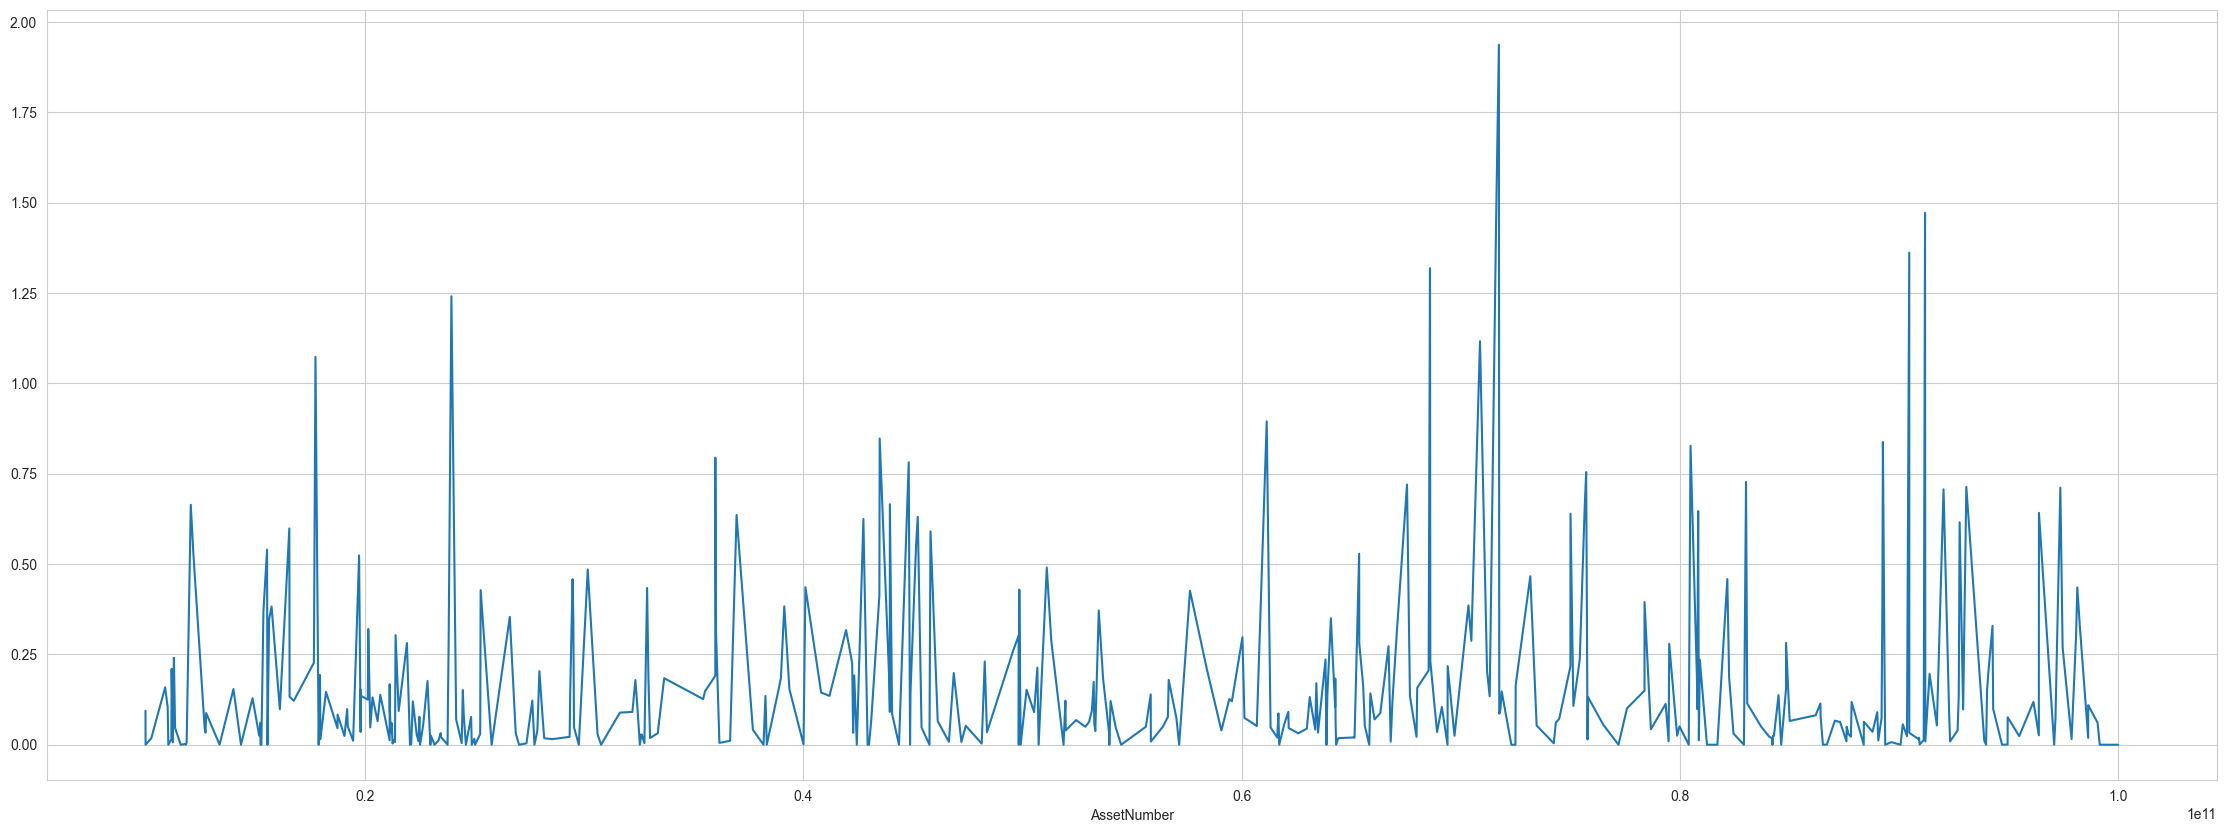

In [9]:
df.groupby('AssetNumber')['DelayTime'].mean().plot(figsize = (28,10))
# plt.xticks(df.index)
plt.show()

<AxesSubplot: title={'center': 'Under Construction Time (All Records Under 50)'}, xlabel='AssetNumber', ylabel='UnderConstructionTime'>

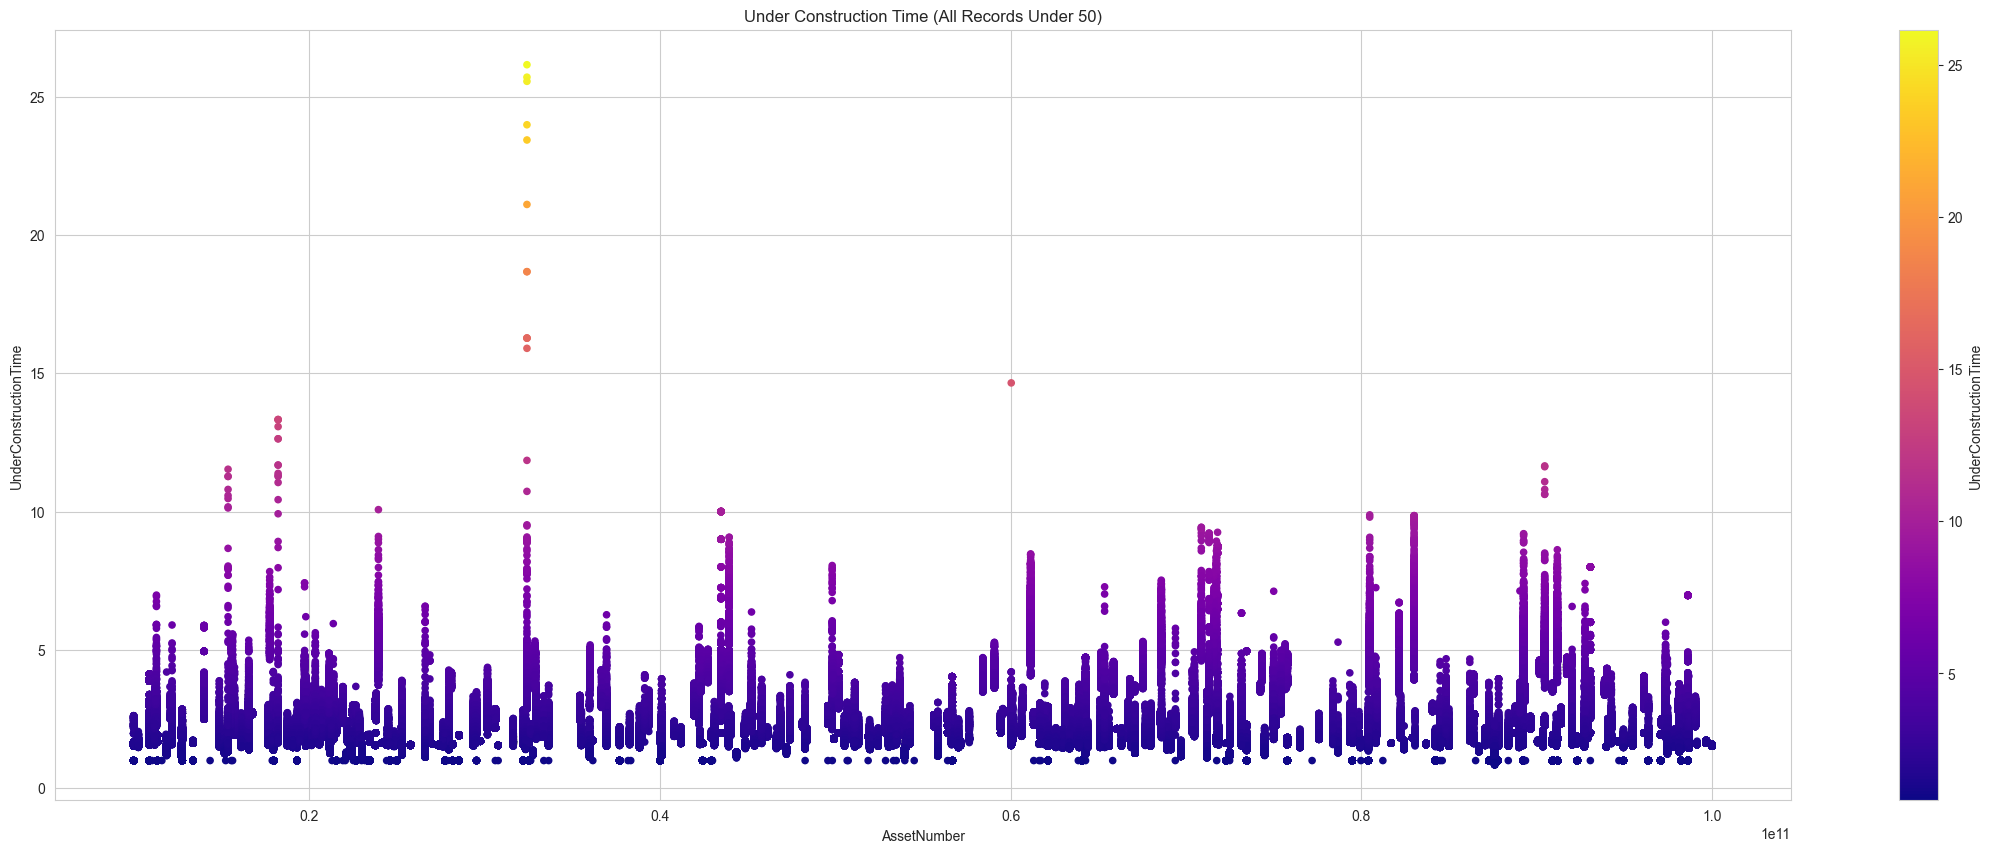

In [24]:
df_50 = df[(df['UnderConstructionTime'] < 50)].reset_index(drop=True)
df_50.plot.scatter(x="AssetNumber", y="UnderConstructionTime", c="UnderConstructionTime", colormap='plasma', figsize = (28,10), title='Under Construction Time (All Records Under 50)')

<AxesSubplot: title={'center': 'Delay Time (All Records Under 50)'}, xlabel='AssetNumber', ylabel='DelayTime'>

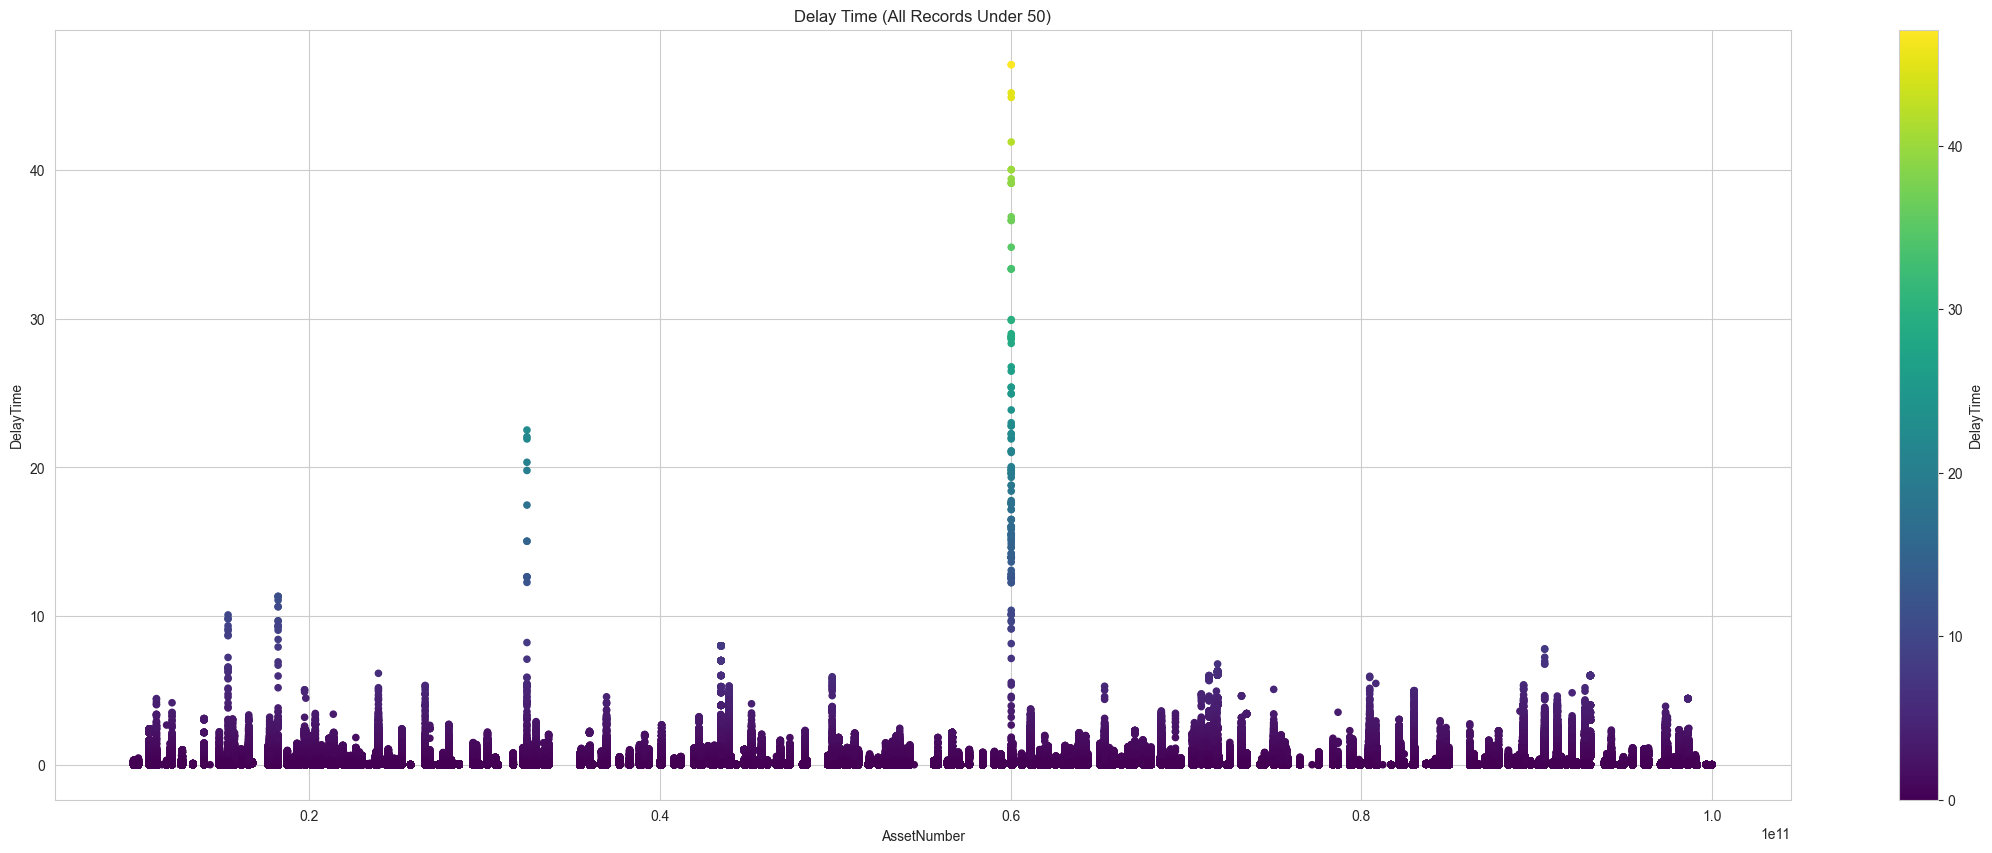

In [22]:
df_Delay50 = df[(df['DelayTime'] < 50)].reset_index(drop=True)
df_Delay50.plot.scatter(x="AssetNumber", y="DelayTime", c="DelayTime", colormap='viridis', figsize = (28,10), title='Delay Time (All Records Under 50)')

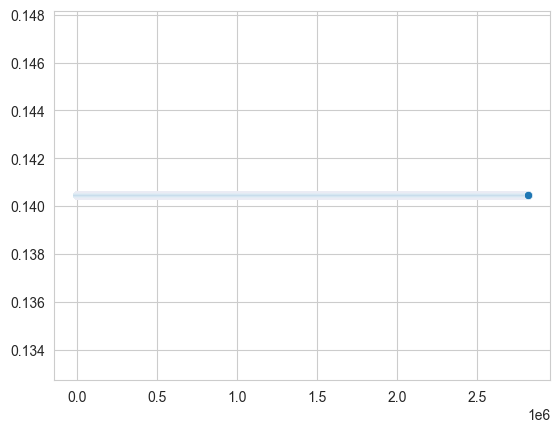

In [28]:
sns.scatterplot(x=df.index, y=df.DelayTime.mean(), data=df)
# plt.xticks(df.index)
plt.show()